### Load Data
Right now our data is in a bunch of csv files. We can combine them and load them all into one pandas dataframe.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from glob import glob
import os
import statsmodels.api as sm

exp_dir = r'C:\Users\letmedoit\endothelial Polarization-exp 1'

csv_files = glob(os.path.join(exp_dir, "csvfiles/*.csv"))


df_in_each_file = (pd.read_csv(f) for f in csv_files1)
df = pd.concat(df_in_each_file, ignore_index=True)

### Look at data
We can use `df.head()`, `df.info()`, and `df.describe()` to quickly get a sense of our data.

In [60]:
df.head()

,ROICentroidsXInPixels,ROICentroidsYInPixels,anglesInDeg,anglesInRad,fileID,golgiAreaInSquareMicrons,golgiCentroidsXInPixels,golgiCentroidsYInPixels,golgiPerimeterInMicrons,nucleiAreaInSquareMicrons,nucleiCentroidsXInPixels,nucleiCentroidsYInPixels,nucleiPerimeterInMicrons
0,111,111,-0.28,-0.00,Animal 1_2hrs_003,2.83,108.97,199.75,9.44,127.97,108.53,108.94,43.90
1,111,111,-45.93,-0.80,Animal 1_2hrs_003,54.40,128.67,127.50,67.98,85.94,91.94,91.95,38.90
2,111,111,35.85,0.63,Animal 1_2hrs_003,37.14,69.05,164.36,52.75,104.75,110.42,107.10,40.54
3,111,111,36.05,0.63,Animal 1_2hrs_003,47.37,77.34,178.67,47.12,44.89,110.68,132.88,31.10
4,111,111,6.12,0.11,Animal 1_2hrs_004,0.45,108.08,215.87,3.21,142.37,119.11,113.00,49.64


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
ROICentroidsXInPixels        935 non-null int64
ROICentroidsYInPixels        935 non-null int64
anglesInDeg                  935 non-null float64
anglesInRad                  935 non-null float64
fileID                       935 non-null object
golgiAreaInSquareMicrons     935 non-null float64
golgiCentroidsXInPixels      935 non-null float64
golgiCentroidsYInPixels      935 non-null float64
golgiPerimeterInMicrons      935 non-null float64
nucleiAreaInSquareMicrons    935 non-null float64
nucleiCentroidsXInPixels     935 non-null float64
nucleiCentroidsYInPixels     935 non-null float64
nucleiPerimeterInMicrons     935 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 95.0+ KB


In [62]:
df.describe()

,ROICentroidsXInPixels,ROICentroidsYInPixels,anglesInDeg,anglesInRad,golgiAreaInSquareMicrons,golgiCentroidsXInPixels,golgiCentroidsYInPixels,golgiPerimeterInMicrons,nucleiAreaInSquareMicrons,nucleiCentroidsXInPixels,nucleiCentroidsYInPixels,nucleiPerimeterInMicrons
count,935.0,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,111.0,111.0,5.292727,0.092449,47.548182,101.955230,160.775626,68.866674,142.486963,107.617754,106.805444,57.334706
std,0.0,0.0,52.387139,0.914315,33.470697,46.335802,35.861204,43.743325,62.443822,13.785786,13.072949,21.348090
min,111.0,111.0,-175.760000,-3.070000,0.120000,0.810000,20.610000,0.950000,0.010000,41.090000,51.810000,0.000000
25%,111.0,111.0,-25.370000,-0.440000,27.970000,65.805000,147.230000,41.070000,101.905000,100.445000,99.530000,43.595000
50%,111.0,111.0,6.640000,0.120000,44.380000,100.020000,168.580000,64.840000,133.340000,107.350000,106.390000,53.120000
75%,111.0,111.0,35.980000,0.630000,63.720000,135.970000,184.600000,94.760000,179.810000,114.590000,113.785000,66.055000
max,111.0,111.0,178.730000,3.120000,279.010000,217.320000,220.400000,263.970000,378.730000,151.110000,176.520000,176.950000


### Add columns for later

We can use the `fileID` column as our source of animal ID.


In [117]:
df['animal_id'] = df.fileID.str.split('_', expand=True).get(0)
print('number of animals: {}'. format(animal_id.nunique()))
df['animal_id'].head()

number of animals: 2


0    Animal 1
1    Animal 1
2    Animal 1
3    Animal 1
4    Animal 1
Name: animal_id, dtype: object

Same stuff with the timing info

In [119]:
df['time'] = df.fileID.str.split('_', expand=True).get(1)
print('number of times: {}'. format(df['time'].nunique()))
df['time'].head()

number of times: 3


0    2hrs
1    2hrs
2    2hrs
3    2hrs
4    2hrs
Name: time, dtype: object

## Check for obvious correlations

We can check for any obvious correlations using a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021FAF160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000224E7710>]], dtype=object)

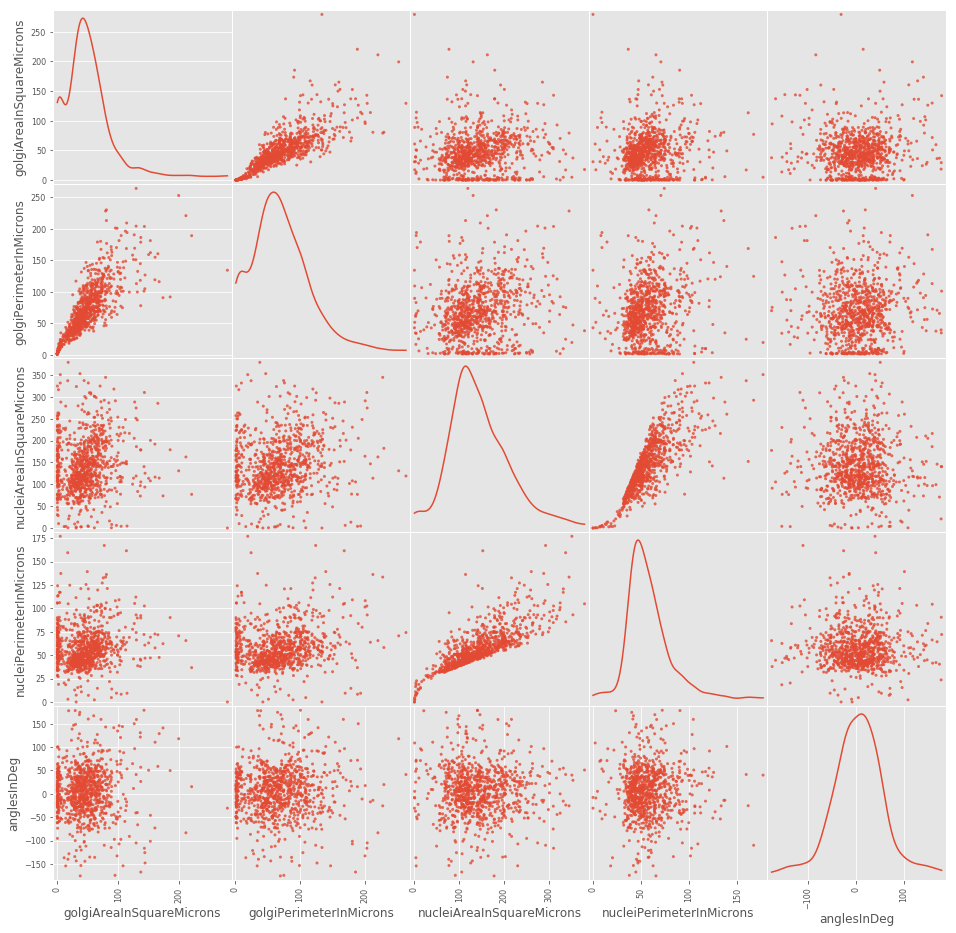

In [66]:
from pandas.plotting import scatter_matrix

dfa = df[['golgiAreaInSquareMicrons',
            'golgiPerimeterInMicrons',
            'nucleiAreaInSquareMicrons',
            'nucleiPerimeterInMicrons',
            'anglesInDeg']]

scatter_matrix(dfa, alpha=0.8, figsize=(16,16), diagonal='kde')

### Thoughts on scatter matrix

- As expected, areas and perimeters are correlated.
    - Let's drop the perimeter columns and use area from now on.
- No obvious correlation between angles and other parameters.
- No obvious correlation between nuclei area/perimeter and other variables. (Good! We don't expect DEE to change nuclei at all.)
- There are a number of misreconstructed golgi as seen by the stacking at 0 area/perimeter.
    - These will be filtered out
- The orientation angles between the golgi and the nuclei look somewhat Gaussian in nature.


## Make new dataframe

In [120]:
new_df = df.filter(['golgiAreaInSquareMicrons',
                   'anglesInDeg',
                   'nucleiAreaInSquareMicrons',
                   'time',
                   'animal_id'],
                  axis=1)

### Look at misreconstructed Golgi

Text(0.5,1,'Closer look at Golgi Area Histogram')

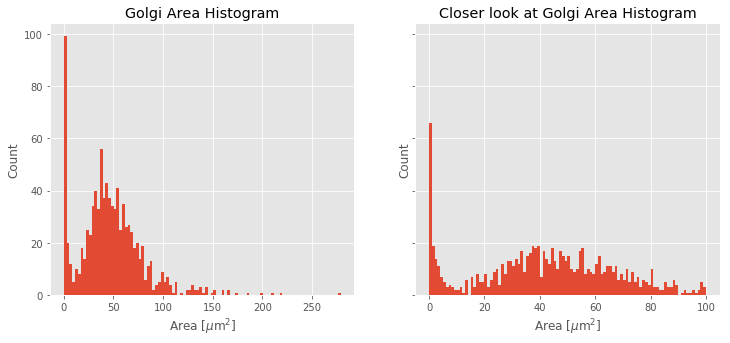

In [121]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

new_df.golgiAreaInSquareMicrons.hist(bins=100, ax=ax[0])
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Count')
ax[0].set_title('Golgi Area Histogram')

new_df.golgiAreaInSquareMicrons.hist(bins=100, ax=ax[1],
                                     range=[0, 100])
ax[1].set_xlabel('Area [$\mu$m$^2$]')
ax[1].set_ylabel('Count')
ax[1].set_title('Closer look at Golgi Area Histogram')

10 microns seems like a reasonable value for our golgi area floor.

We can also set a ceiling

In [138]:
area_at_least_10_microns_squared = new_df.golgiAreaInSquareMicrons >= 10
area_below_100_microns_squared = new_df.golgiAreaInSquareMicrons < 100

golgi_area_cut = area_at_least_10_microns_squared & area_below_100_microns_squared

In [135]:
n_start = len(new_df.golgiAreaInSquareMicrons)
n_remaining_after_floor_cut = np.sum(area_at_least_10_microns_squared)
percent_remaining = round(n_remaining_after_area_cut/n_start * 100 , 1)

print('values at start : {}'.format(n_start))
print('values after area floor cut : {}'.format(n_remaining_after_area_cut))
print('% remaining : {}%'.format(percent_remaining))

values at start : 935
values after area floor cut : 10
% remaining : 1.1%


In [139]:
n_start = len(new_df.golgiAreaInSquareMicrons)
n_remaining_after_area_cut = np.sum(golgi_area_cut)
percent_remaining = round(n_remaining_after_area_cut/n_start * 100 , 1)

print('values at start : {}'.format(n_start))
print('values after area floor cut : {}'.format(n_remaining_after_area_cut))
print('% remaining : {}%'.format(percent_remaining))

values at start : 935
values after area floor cut : 745
% remaining : 79.7%


In [143]:
is_animal1 = new_df.animal_id == 'Animal 1'
is_animal2 = new_df.animal_id == 'Animal 2'

animal1 = new_df[golgi_area_cut & is_animal1]
animal2 = new_df[golgi_area_cut & is_animal2]

Text(0.5,1,'Animal 2 Golgi Area')

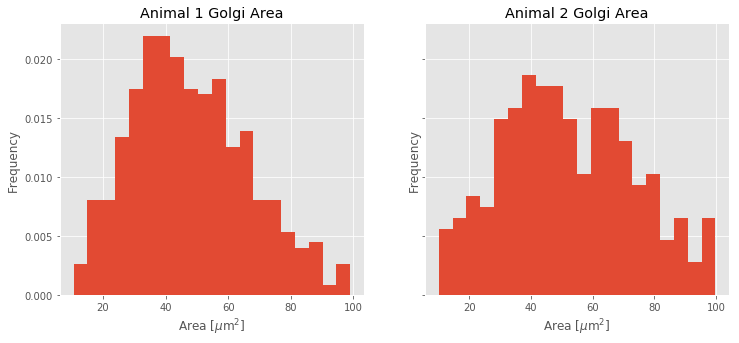

In [152]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

animal1.golgiAreaInSquareMicrons.hist(bins=20,
                                      ax=ax[0],
                                      normed=True)
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Animal 1 Golgi Area')

animal2.golgiAreaInSquareMicrons.hist(bins=20,
                                      ax=ax[1],
                                      normed=True)
ax[1].set_xlabel('Area [$\mu$m$^2$]')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Animal 2 Golgi Area')

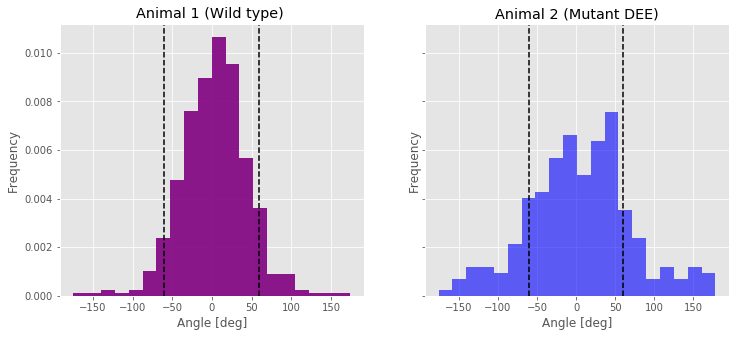

In [178]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

animal1.anglesInDeg.hist(bins=20,
                         ax=ax[0],
                         normed=True,
                        color = 'purple',
                        alpha=0.9)
ax[0].set_xlabel('Angle [deg]')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Animal 1 (Wild type) ')
ax[0].axvline(-60, color='k',linestyle='--')
ax[0].axvline(60, color='k',linestyle='--')

animal2.anglesInDeg.hist(bins=20,
                         ax=ax[1],
                         normed=True,
                        color='blue',
                        alpha=0.6)
ax[1].set_xlabel('Angle [deg]')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Animal 2 (Mutant DEE)')

ax[1].axvline(-60, color='k',linestyle='--')
ax[1].axvline(60, color='k',linestyle='--')


### Separate by time

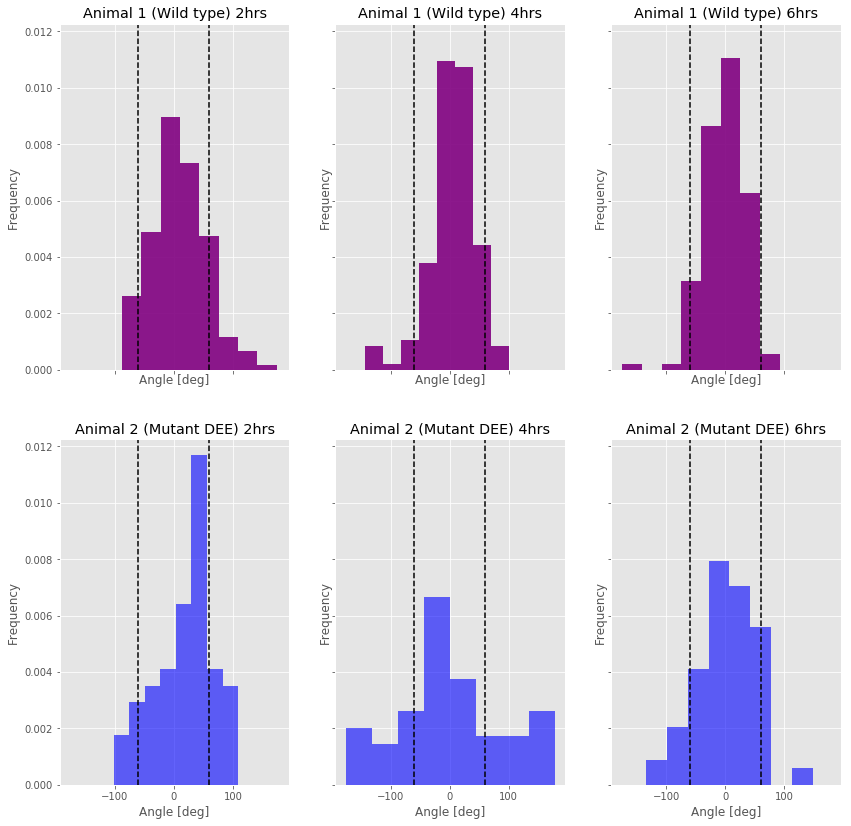

In [203]:
fig, axes = plt.subplots(2,3, figsize=(14,14), sharey=True, sharex=True)
ax = axes.ravel()
times = ['2hrs', '4hrs', '6hrs']

for i, time in enumerate(times):
    ax[i] = animal1[animal1.time == time].anglesInDeg.hist(bins=8,
                                                           ax=ax[i],
                                                           normed=True,
                                                           color = 'purple',
                                                           alpha=0.9
                                                          )
    
    ax[i+3] = animal2[animal2.time == time].anglesInDeg.hist(bins=8,
                                                             ax=ax[i+3],
                                                             normed=True,
                                                             color='blue',
                                                             alpha=0.6
                                                            )
    ax[i].set_xlabel('Angle [deg]')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title('Animal 1 (Wild type) {}'.format(time))
    ax[i].axvline(-60, color='k',linestyle='--')
    ax[i].axvline(60, color='k',linestyle='--')
    
    ax[i+3].set_xlabel('Angle [deg]')
    ax[i+3].set_ylabel('Frequency')
    ax[i+3].set_title('Animal 2 (Mutant DEE) {}'.format(time))
    ax[i+3].axvline(-60, color='k',linestyle='--')
    ax[i+3].axvline(60, color='k',linestyle='--')
    

## Orientation percentage

In [260]:
def orientation_percent(animal_data_frame, want_ratio=False):
    angles = animal_data_frame.anglesInDeg
    is_oriented = np.abs(angles) <= 60.
    n_angles = len(angles)
    n_angles_after_orientation_cut = np.sum(is_oriented)

    ratio_oriented = n_angles_after_orientation_cut/n_angles
    percent_oriented = round(ratio_oriented * 100 ,2)
    
    if want_ratio:
        return ratio_oriented
    else:
        return percent_oriented

In [261]:
orientation_percent_animal1 = orientation_percent(animal1)
orientation_percent_animal2 = orientation_percent(animal2)

print("Cumulative over all times")
print("animal 1 orientation : {}%".format(orientation_percent_animal1))
print("animal 2 orientation : {}%".format(orientation_percent_animal2))


Cumulative over all times
animal 1 orientation : 87.94%
animal 2 orientation : 68.2%


In [262]:
def sample_proportion_error(p, n):
    return np.sqrt(p*(1-p) / n)

In [267]:
animal1_orientation = []
animal2_orientation = []

animal1_errors = []
animal2_errors = []

for time in times:
    n1 = len(animal1[animal1.time == time])
    n2 = len(animal2[animal2.time == time])
    orientation_percent_animal1 = orientation_percent(animal1[animal1.time == time])
    orientation_percent_animal2 = orientation_percent(animal2[animal2.time == time])
    
    animal1_orientation.append(orientation_percent_animal1)
    animal2_orientation.append(orientation_percent_animal2)
    
    ratio_animal1 = orientation_percent(animal1[animal1.time == time], want_ratio=True)
    ratio_animal2 = orientation_percent(animal2[animal2.time == time], want_ratio=True)
    
    animal1_errors.append(sample_proportion_error(ratio_animal1, n1)*100)
    animal2_errors.append(sample_proportion_error(ratio_animal2, n2)*100)
    print("{}".format(time))
    print("animal 1 orientation : {}%".format(orientation_percent_animal1))
    print("animal 2 orientation : {}%".format(orientation_percent_animal2))
    print("\n")


#animal2.time == time

2hrs
animal 1 orientation : 82.35%
animal 2 orientation : 73.85%


4hrs
animal 1 orientation : 87.82%
animal 2 orientation : 55.13%


6hrs
animal 1 orientation : 94.48%
animal 2 orientation : 75.0%




In [268]:
print(np.round(animal1_errors,4), np.round(animal2_errors,4))

[ 2.7878  2.6185  1.789 ] [ 5.451   5.6315  4.4194]


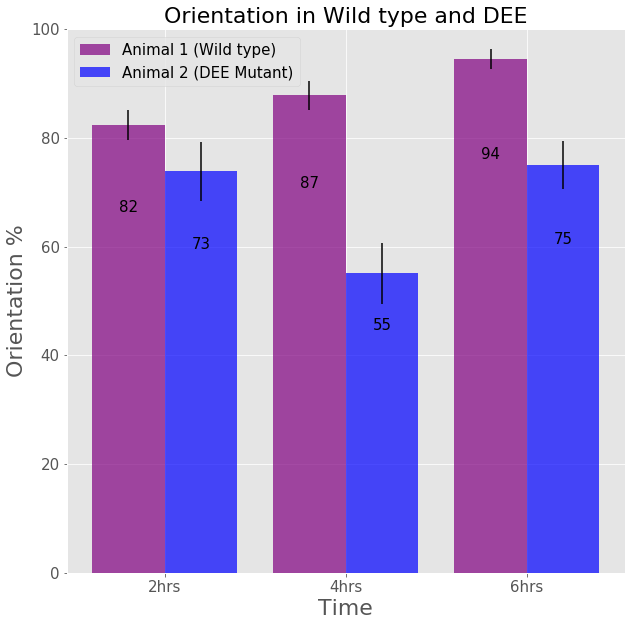

In [271]:
plt.style.use('ggplot')
plt.rc('axes', titlesize = 22)
plt.rc('axes', labelsize = 22)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    # Shamelessly taken from https://matplotlib.org/examples/api/barchart_demo.html
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.80*height,
                '%d' % round(float(height),2),
                ha='center', va='bottom', size=15)

n_groups = 3
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.7

rects1 = plt.bar(index, animal1_orientation,
                 bar_width,
                alpha=opacity,
                color='purple',
                label='Animal 1 (Wild type)',
                yerr = animal1_errors)

rects2 = plt.bar(index + bar_width, animal2_orientation,
                 bar_width,
                alpha=opacity,
                color='blue',
                label='Animal 2 (DEE Mutant)',
                yerr = animal2_errors)

autolabel(rects1)
autolabel(rects2)
plt.xlabel("Time")
plt.ylabel("Orientation %")
plt.title("Orientation in Wild type and DEE")
plt.xticks(index + bar_width/2, tuple(times))
plt.ylim([0,100])
plt.legend(fontsize=15)

In [47]:
exp3_dir = r'C:\Users\letmedoit\17_09_13-golgi polarity exp 3'
csv_files3 = glob(os.path.join(exp3_dir, "csvfiles/*.csv"))

df3_in_each_file = (pd.read_csv(f) for f in csv_files3)
df3 = pd.concat(df3_in_each_file, ignore_index=True)
df3

,ROICentroidsXInPixels,ROICentroidsYInPixels,anglesInDeg,anglesInRad,fileID,golgiAreaInSquareMicrons,golgiCentroidsXInPixels,golgiCentroidsYInPixels,golgiPerimeterInMicrons,nucleiAreaInSquareMicrons,nucleiCentroidsXInPixels,nucleiCentroidsYInPixels,nucleiPerimeterInMicrons
0,111,111,29.79,0.52,Animal 1_2HRS_005,45.65,51.79,174.64,46.45,109.68,94.11,100.72,41.84
1,111,111,-18.74,-0.33,Animal 1_2HRS_005,12.92,123.48,169.20,31.90,107.41,105.60,116.49,40.87
2,111,111,-15.86,-0.28,Animal 1_2HRS_005,54.51,129.25,173.96,66.36,65.81,109.23,103.52,36.49
3,111,111,4.13,0.07,Animal 1_2HRS_005,49.84,101.32,185.50,43.45,166.46,106.22,117.50,52.80
4,111,111,-68.61,-1.20,Animal 1_2HRS_006,1.48,193.26,142.30,7.90,1.82,114.00,111.25,16.59
5,111,111,-158.63,-2.77,Animal 1_2HRS_006,58.49,130.40,54.07,115.48,247.95,112.73,99.22,82.68
6,111,111,36.51,0.64,Animal 1_2HRS_010,196.76,108.41,138.54,358.41,98.53,126.62,113.95,45.05
7,111,111,-30.81,-0.54,Animal 1_2HRS_010,28.75,146.62,169.30,54.31,80.16,115.78,117.58,34.50
8,111,111,23.29,0.41,Animal 1_2HRS_010,63.42,60.53,196.29,118.27,310.87,86.92,134.98,109.30
9,111,111,-135.84,-2.37,Animal 1_2HRS_011,16.92,150.93,62.99,33.17,76.74,110.57,104.55,36.82


## Sanity check

Let's plot the distributions of Golgi area [square microns] and perimeter [microns]; make sure they're a reasonable value.

We expect the area to be around 40-50 microns squared while the perimeter should be around 60 microns.

Any significant deviation likely indicates that the program failed to select the correct feature. This provides an easy removal criteria.

Text(0.5,1,'Golgi Perimeter Histogram')

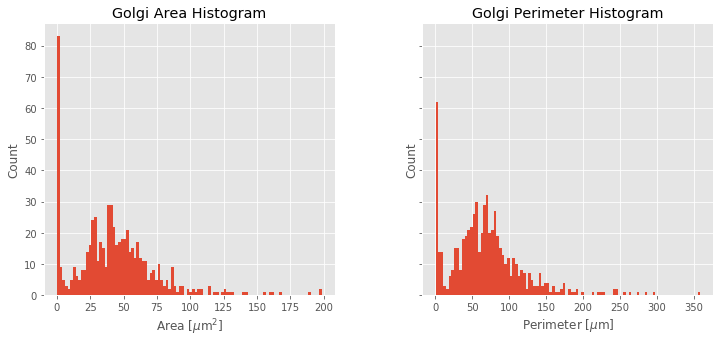

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

nbins = 100

# area
df3.hist(column='golgiAreaInSquareMicrons', ax=ax[0], bins=nbins)
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Count')
ax[0].set_title('Golgi Area Histogram')


# perimeter
df3.hist(column='golgiPerimeterInMicrons', ax=ax[1], bins=nbins)
ax[1].set_xlabel('Perimeter [$\mu$m]')
ax[1].set_ylabel('Count')
ax[1].set_title('Golgi Perimeter Histogram')

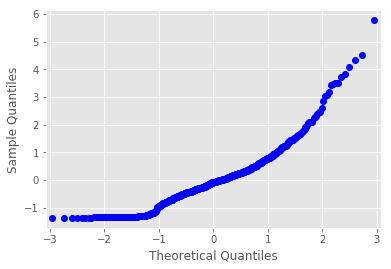

In [51]:
plt.figure(figsize=(8,8))
fig = sm.qqplot(df3['golgiPerimeterInMicrons'] - np.mean(df3['golgiPerimeterInMicrons']),
                'norm',
                fit=True,
                #line='45'
               )

Text(0.5,1,'Nuclei Perimeter Histogram')

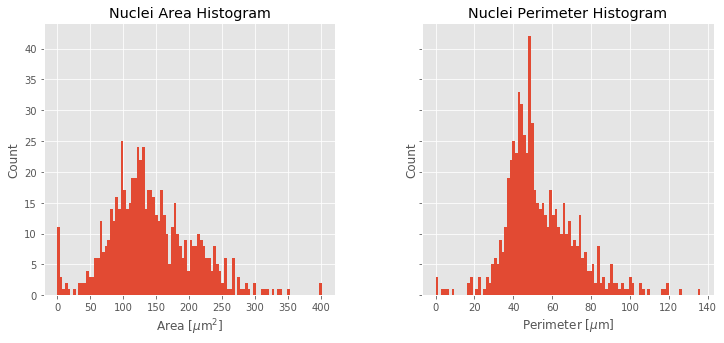

In [46]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

nbins = 100
# area
df3.hist(column='nucleiAreaInSquareMicrons', ax=ax[0], bins=nbins)
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Count')
ax[0].set_title('Nuclei Area Histogram')


# perimeter
df3.hist(column='nucleiPerimeterInMicrons', ax=ax[1], bins=nbins)
ax[1].set_xlabel('Perimeter [$\mu$m]')
ax[1].set_ylabel('Count')
ax[1].set_title('Nuclei Perimeter Histogram')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001ED5F4A8>]], dtype=object)

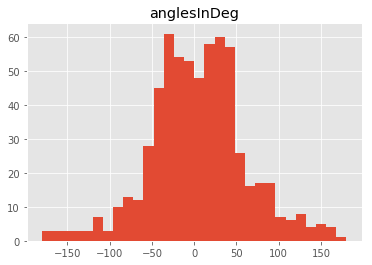

In [50]:
plt.figure(figsize=(8,8))

df3.hist(column='anglesInDeg' , range=(-180, 180), bins=30)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E7A7D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001EB9AA20>]], dtype=object)

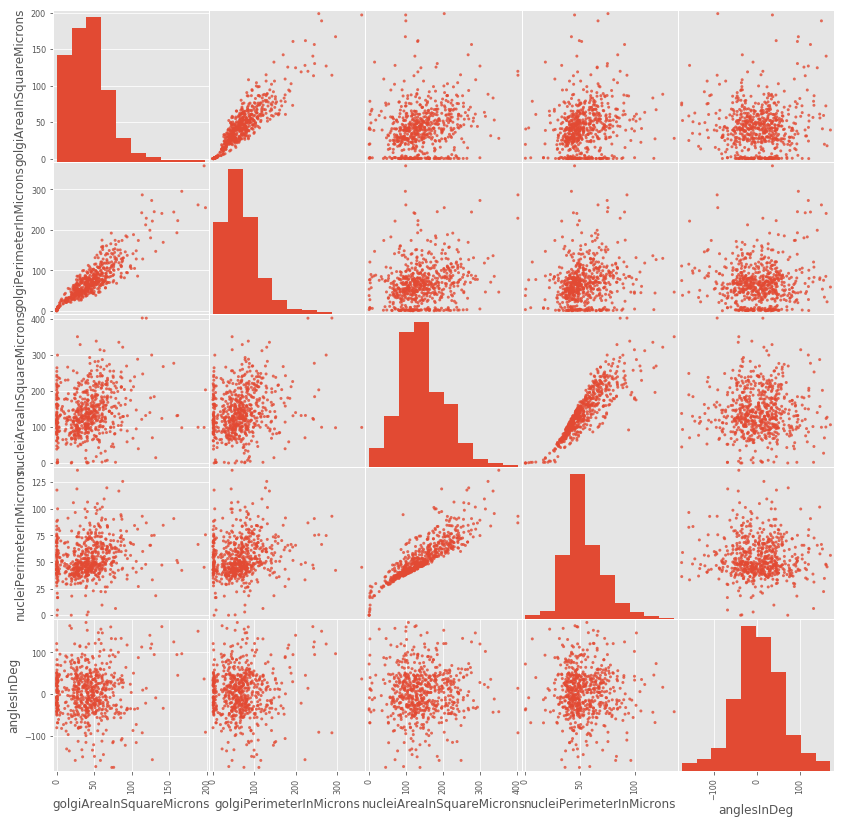

In [48]:
from pandas.plotting import scatter_matrix

df3a = df3[['golgiAreaInSquareMicrons',
            'golgiPerimeterInMicrons',
            'nucleiAreaInSquareMicrons',
            'nucleiPerimeterInMicrons',
            'anglesInDeg']]
scatter_matrix(df3a, alpha=0.8, figsize=(14,14))